# Задание 04 

## Различные подходы поиска сообществ

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import random
import collections


### 1. Модулярность (3 балла) 
Рассмотрим разбиение сети на два сообщества. Определите максимальное и минимальное значение модулярности сети.

$\textit{Модулярность сообщества: }  M_C = \displaystyle \frac{L_C}{L} - \bigg{(}\frac{k_C}{2L} \bigg{)}^2$, где $L_C$-число ребер внутри сообщества,  $L$- общее число ребер в сети, $k_C = \displaystyle  \sum_{j \in C} k_j $- сумма степеней вершин в сообществе.

$\textit{Модулярность cети: } M = \displaystyle \sum_C M_C$

$k_C = 2L_C + L_e$, где $L_e$ - количество ребер, у которых только одна вершина входит в сообщество. Следовательно, модулярность сообщества можно переписать в виде: $M_C = \displaystyle \frac{L_C}{L} - \bigg{(}\frac{L_C}{L}  + \frac{L_e}{2L} \bigg{)}^2$

Модулярность сообщества $\underline{минимальна}$ при $L_C = 0$ и максимально возможном $L_e$. Воспользуемся неравенством $(a+b)^2 \geq a^2 + b^2 $. Тогда $M_C = \displaystyle \frac{L_C}{L} - \bigg{(}\frac{L_C}{L}  + \frac{L_e}{2L} \bigg{)}^2 \geq  \frac{L_C}{L} -  \bigg{(}\frac{L_C}{L} \bigg{)}^2  -  \bigg{(}\frac{L_e}{2L} \bigg{)}^2$. Значит, модулярность минимальна, когда $L_C = 0$ и все ребра являются межкластерными. Для одного сообщества $M_C \geq \displaystyle -\frac{1}{4} \Longrightarrow $ модулярность сети с двумя сообществами $ M \geq \displaystyle -\frac{1}{2} $.

Модулярность сообщества $\underline{максимальна}$, если сеть состоит из двух несвязных между собой сообществами, т.е. $L_e = 0 \Longrightarrow M_C = \displaystyle  \frac{L_C}{L} -  \bigg{(}\frac{L_C}{L} \bigg{)}^2 $. Найдем значение $L_C$, при котором достигается максимум $M_C$. Рассмотрим $M_C$ как функцию от $L_C$, то есть парабола с ветвями вниз. Максимум достигается в вершине $L_C^{max} = \displaystyle \frac{-1}{L} :  \frac{-2}{L^2} = \frac{L}{2} \Longrightarrow $ $ M_C^{max} =  \displaystyle \frac{L}{2} \cdot \frac{1}{L} - \bigg{(} \frac{L}{2} \cdot \frac{1}{L} \bigg{)}^2 = \frac{1}{4} \Longrightarrow $ Для одного сообщества $M_C \leq \displaystyle \frac{1}{4} \Longrightarrow$ модулярность сети с двумя сообществами $M \leq \displaystyle
\frac{1}{2}$ 

$\textbf{Вывод:}$ Значение модулярности сети с разбиением на два сообщества лежит в отрезке $\displaystyle[-\frac{1}{2}, \frac{1}{2}]$.

### 2. Алгоритм Лювена (3 балла) 

Протестируйте алгоритм Лювена на блочно-стохастической модели (см. Семинар 04.02), для этого постройте зависимость метрики качества от параметра модели $\mu$: 
$$
 \mu=\frac{p_{out}}{p_{in}+p_{out}}
$$

Реализация алгоритма Лювена:

In [27]:
import community as co 

In [28]:
G = nx.karate_club_graph()

In [29]:
part = co.best_partition(G)
print(part)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 0, 9: 1, 10: 2, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 2, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 3, 24: 3, 25: 3, 26: 0, 27: 3, 28: 3, 29: 0, 30: 0, 31: 3, 32: 0, 33: 0}


In [30]:
print(co.modularity(part,G))

0.4188034188034188


#### Решение задачи 2

In [31]:
def block_model(n,p_in,p_out):
    A1=np.random.binomial(1, p_in, size=[n,n]) # for edges inside clusters
    A2=np.random.binomial(1, p_in, size=[n,n])
    for i in range(n):
        A1[i,i]=0
        A2[i,i]=0
        for j in range(i+1,n):
            A1[i,j]=A1[j,i]
            A2[i,j]=A2[j,i]
        
    B=np.random.binomial(1, p_out, size=[n,n]) # for edges between clusters
    A=np.block([[A1,B],[B,A2]])
    G=nx.from_numpy_matrix(A)
    return G

In [32]:
from sklearn.metrics import mutual_info_score

In [33]:
n = 100
p_in =0.3
p_out = np.arange(0, 0.32, 0.02)
mixing_par = []
mi = []

In [34]:
for i in p_out:
    bG=block_model(n,p_in,i) #блочно-стохастическая сеть 
    louvain_labels = co.best_partition(bG)
    y_pred= list(louvain_labels.values()) #предсказанные метки
    y_true=[0]*100+[1]*100     #истинные метки 
    
    mu = i/(p_in + i) #mixing parametr
    mixing_par.append(mu)
    mi.append(mutual_info_score(y_true,y_pred))

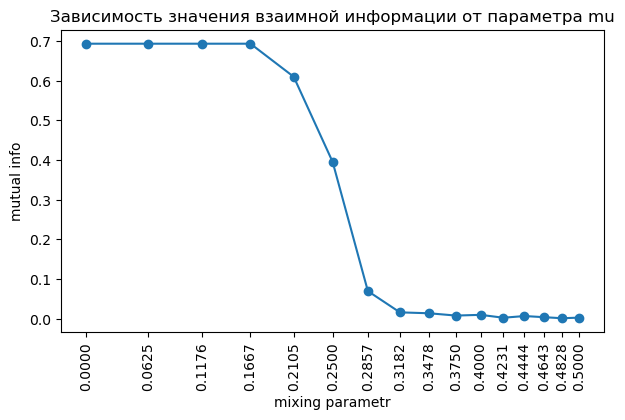

In [35]:
fig = plt.figure(figsize=(7,4),dpi=100)
plt.plot(mixing_par, mi,'-o')
plt.xticks(mixing_par,rotation=90)
plt.xlabel("mixing parametr")
plt.ylabel("mutual info")
plt.title("Зависимость значения взаимной информации от параметра mu");

### 3.  Спектральные методы выделения сообществ (3 балла)
Будем работать с маленькой сетью социального взаимодействия среди [дельфинов](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.174.3721&rep=rep1&type=pdf). 
* разбейте сеть на два сообщества по собственному вектору матрицы Лапласа;
* сравните с разбиением алгоритмом Лювена

Одинаковы ли эти разбиения? Сделайте визуализацию для наглядности. 

In [36]:
G=nx.read_edgelist('soc-dolphins.txt', nodetype=int)

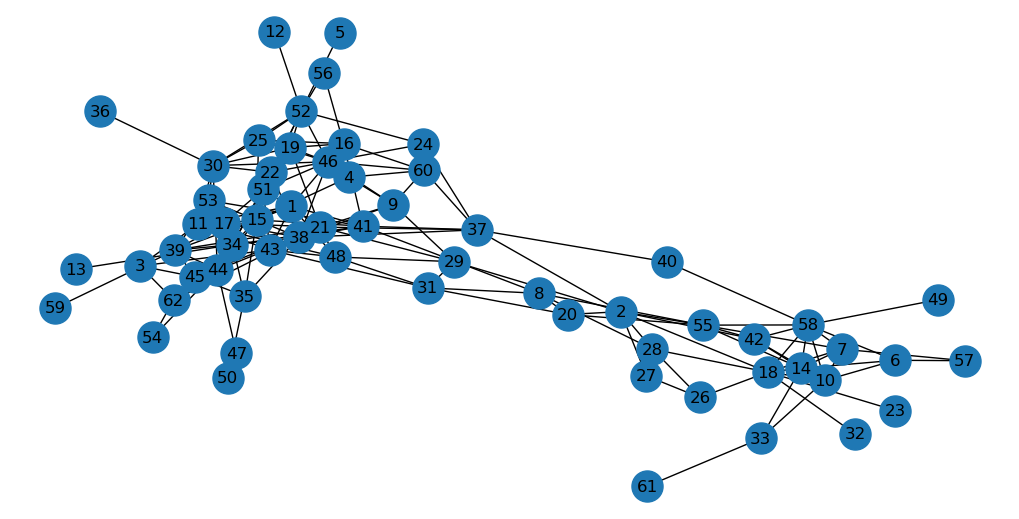

In [37]:
fig = plt.figure(figsize=(10,5),dpi=100)
pos=nx.spring_layout(G)
nx.draw(G,pos,node_size=500,with_labels=True)
limits=plt.axis('off')

In [38]:
L = nx.normalized_laplacian_matrix(G).todense()  #нормализованная матрица Лапласа

In [39]:
e, v = np.linalg.eig(L) #собственные значения и вектора
e = e[np.argsort(e)] #сортировка собственных значений 
v = v[:,np.argsort(e)] 

clusters = []
for i in v[:,1]: #берем вектор, соответствующий первому ненулевому собственному значению
    clusters.append(np.sign(i.tolist()[0][0])) #метка сообществ


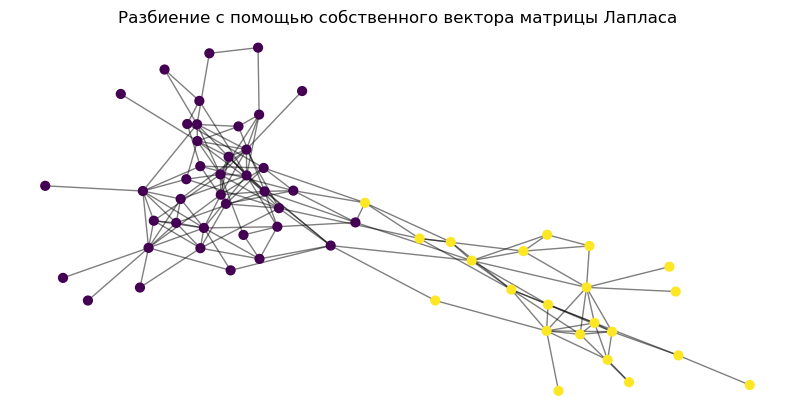

In [40]:
fig = plt.figure(figsize=(10,5),dpi=100)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, G.nodes() , node_size=40, node_color=clusters)
nx.draw_networkx_edges(G, pos, alpha=0.5)
limits=plt.axis('off')
plt.title("Разбиение с помощью собственного вектора матрицы Лапласа")
plt.show()

In [41]:
louvain_labels = co.best_partition(G) #алгоритм Лювена
louvain_labels

{11: 1,
 1: 1,
 15: 0,
 16: 2,
 41: 0,
 43: 1,
 48: 1,
 18: 3,
 2: 3,
 20: 1,
 27: 3,
 28: 3,
 29: 4,
 37: 4,
 42: 3,
 55: 3,
 3: 1,
 45: 0,
 62: 0,
 9: 4,
 4: 4,
 60: 4,
 52: 2,
 5: 2,
 10: 3,
 6: 3,
 14: 3,
 57: 3,
 58: 3,
 7: 3,
 8: 1,
 31: 1,
 21: 0,
 38: 0,
 46: 2,
 33: 3,
 30: 2,
 12: 2,
 34: 0,
 13: 0,
 17: 0,
 25: 2,
 35: 0,
 39: 0,
 44: 0,
 51: 0,
 53: 0,
 19: 2,
 56: 2,
 23: 3,
 26: 3,
 32: 3,
 22: 2,
 24: 2,
 36: 2,
 61: 3,
 50: 0,
 40: 4,
 59: 0,
 47: 0,
 54: 0,
 49: 3}

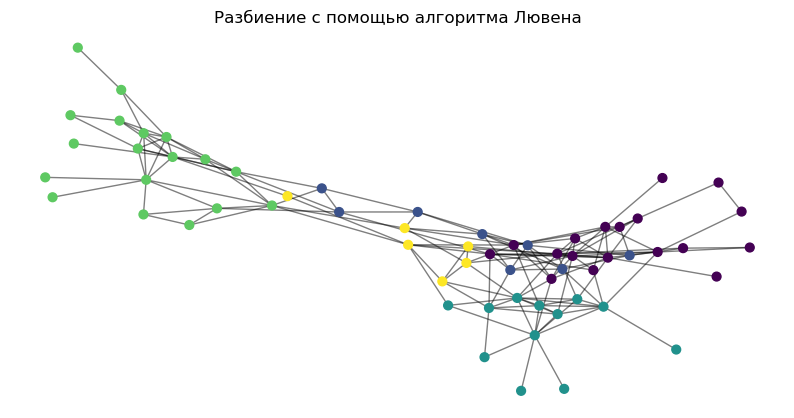

In [42]:
fig = plt.figure(figsize=(10,5),dpi=100)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, louvain_labels.keys(), node_size=40, node_color=list(louvain_labels.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
limits=plt.axis('off')
plt.title("Разбиение с помощью алгоритма Лювена")
plt.show()

Спектральным методом было выделено 2 сообщества, алгоритм Лювена же выделил 5 сообществ.

### 4. Label propagation (3 балла)
Реализуйте алгоритм [Label propagation](https://en.wikipedia.org/wiki/Label_propagation_algorithm):

* в начальный момент времени всем вершинам ставится в соответствие отдельное сообщество.
* Каждая вершина в графе определяется в то сообщество, которому принадлежит большинство
    его соседей. Если же таких сообществ несколько, то выбирается случайно одно из
    них. Из-за случайности важно на каждой итерации изменять порядок обхода вершин. 
* Алгоритм заканчивает работу, когда нечего изменять: все вершины относятся к тем сообществам, что
    и большинство их соседей.
    
Какие сообщества у дельфинов выделяет ваш алгоритм, сравните со спектральными методами. 

In [43]:
#начальная инициализация: каждой вершите ставится в соответствие отдельное сообщество
#возвращается словарь:{вершина - сообщество}
def init(G):
    clusters  = {}
    for i in G.nodes():
        clusters[i] = i
    return clusters      

In [44]:
#шаг алгоритма 
#возвращается словарь:{вершина - сообщество}
def step(G, clusters):
    nodes = list(G.nodes())
    random.shuffle(nodes)  #генерация случайного обхода списка вершин 
    for i in nodes:
        neighbors = list(G.neighbors(i))
        nn_clusters = []
        for n in neighbors:
            nn_clusters.append(clusters.get(n)) #список сообществ соседей вершины 
        counter = collections.Counter(nn_clusters)
        highest_freq = counter.most_common(1)[0][1] 
        most_common_clusters = [] 
        for n in nn_clusters:
            if (counter.get(n) == highest_freq):
                most_common_clusters.append(n) #наиболее часто встречающиеся сообщества среди соседей 
        if (len(most_common_clusters) == 1 ): #если такое сообщество одно,  то вершина принимает метку этого сообщества 
            clusters[i] = most_common_clusters[0]
        else: clusters[i] = random.choice(most_common_clusters) #если часто встречающихся сообществ несколько,
                                                                #то выбирается случайно одно из них
    return clusters

In [45]:
#проверка 
#возвращает результат проверки - Bool 
def test(G, clusters):
    check = True
    nodes = list(G.nodes())
    for i in nodes:
        neighbors = list(G.neighbors(i))
        nn_clusters = []
        for n in neighbors:
            nn_clusters.append(clusters.get(n)) #список сообществ соседей вершины 
        counter = collections.Counter(nn_clusters)
        mode = counter.most_common(1)[0][0] #наиболее встречающееся сообщество среди соседей
        if (clusters.get(i) != mode): #проверка что сообщество вершины равно моде соообществ соседей
            check = False 
    return check

In [46]:
#Label propagation algorithm 
def LPA(G):
    num_steps = 0
    cluster_labels = init(G) #начальная инициализация 
    cluster_labels = step(G, cluster_labels) #первый шаг
    check = test(G, cluster_labels)  #проверка 
    while (check == False): #повторение шага пока резултат проверки не станет True
        cluster_labels = step(G, cluster_labels)
        check = test(G, cluster_labels)
        num_steps +=1
    return cluster_labels, num_steps

In [47]:
LPA_labels, num_steps = LPA(G)
num_steps

7

In [48]:
LPA_labels

{11: 34,
 1: 34,
 15: 34,
 16: 19,
 41: 34,
 43: 34,
 48: 34,
 18: 14,
 2: 14,
 20: 14,
 27: 14,
 28: 14,
 29: 34,
 37: 34,
 42: 14,
 55: 14,
 3: 34,
 45: 34,
 62: 34,
 9: 34,
 4: 34,
 60: 34,
 52: 19,
 5: 19,
 10: 14,
 6: 14,
 14: 14,
 57: 14,
 58: 14,
 7: 14,
 8: 14,
 31: 34,
 21: 34,
 38: 34,
 46: 19,
 33: 14,
 30: 19,
 12: 19,
 34: 34,
 13: 34,
 17: 34,
 25: 19,
 35: 34,
 39: 34,
 44: 34,
 51: 34,
 53: 34,
 19: 19,
 56: 19,
 23: 14,
 26: 14,
 32: 14,
 22: 19,
 24: 19,
 36: 19,
 61: 14,
 50: 34,
 40: 34,
 59: 34,
 47: 34,
 54: 34,
 49: 14}

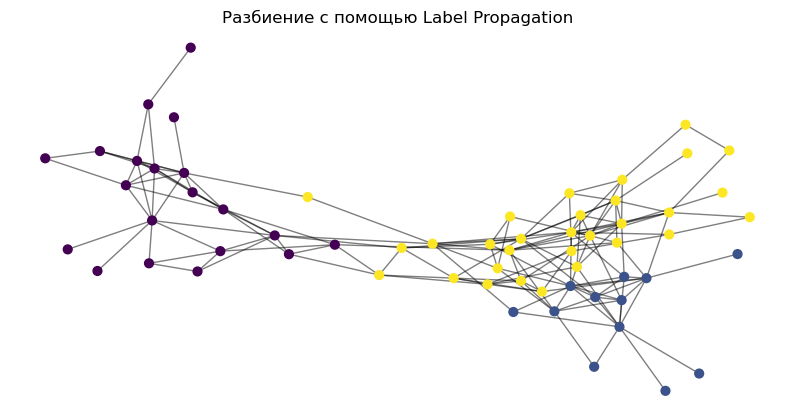

In [49]:
fig = plt.figure(figsize=(10,5),dpi=100)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, LPA_labels.keys(), node_size=40, node_color=list(LPA_labels.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
limits=plt.axis('off')
plt.title("Разбиение с помощью Label Propagation")
plt.show()

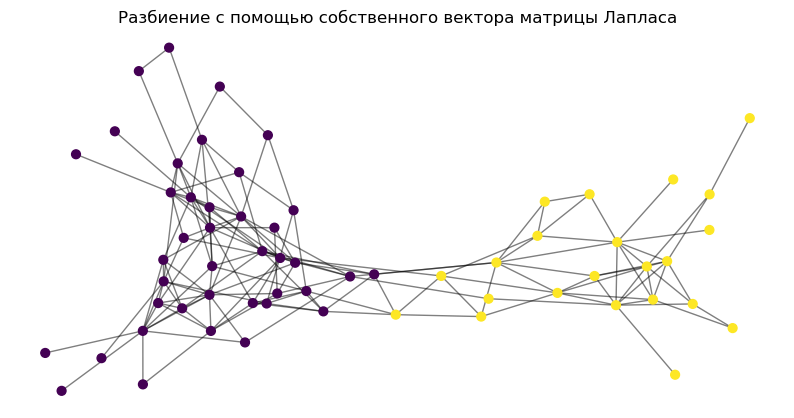

In [50]:
fig = plt.figure(figsize=(10,5),dpi=100)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, G.nodes() , node_size=40, node_color=clusters)
nx.draw_networkx_edges(G, pos, alpha=0.5)
limits=plt.axis('off')
plt.title("Разбиение с помощью собственного вектора матрицы Лапласа")
plt.show()

LPA выделил 3 сообщества в то время, как спектральным методом было выделено 2 сообщества.